<a href="https://colab.research.google.com/github/Rwalam/ML2023-WesleyFreire/blob/main/trabalhoMLEntrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports / Conferindo se há valores nulos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2023-1/creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isna().sum().sum()
#nenhum N.A

0

#HeatMap das labels

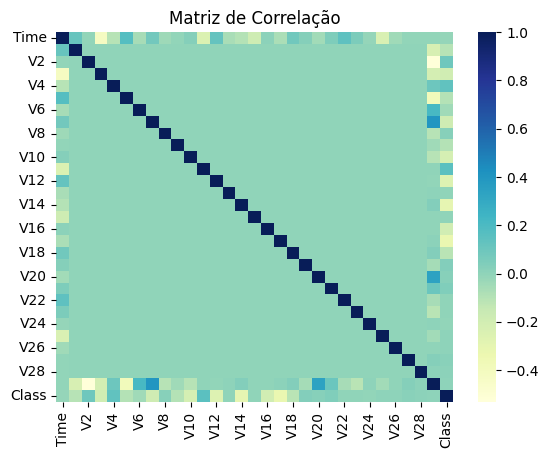

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cmap="YlGnBu")

plt.title("Matriz de Correlação")

plt.show()

#Histograma do tempo pelo fluxo de transações

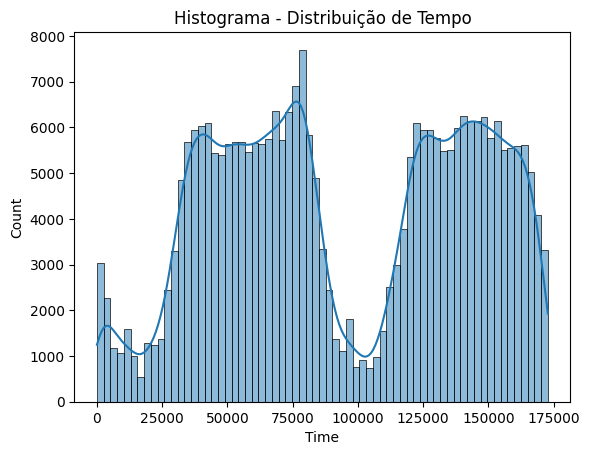

In [ ]:
sns.histplot(data=df, x="Time", kde=True)

plt.title("Histograma - Distribuição de Tempo")

plt.show()

# Problema de desbalanceamento

In [ ]:
contagem = df['Class'].value_counts()
contagem

0    284315
1       492
Name: Class, dtype: int64

# Balanceamento por oversampling

In [ ]:
smt = SMOTE()

In [ ]:
features = df.drop('Class', axis=1)
target = df['Class']

In [ ]:
features, target = smt.fit_resample(features, target)

In [ ]:
contagem = target.value_counts()
contagem

0    284315
1    284315
Name: Class, dtype: int64

#Split de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

#Treino do KNN e obetivo

In [ ]:
test_error_rate = []

for k in range(15, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Fazer previsões nos dados de teste e calcular a taxa de erro
    test_predictions = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_predictions)
    test_error_rate.append(test_error)

In [ ]:
test_error_rate

[0.02908745581485328,
 0.031241756502470852,
 0.03753759034873294,
 0.0394368921794489,
 0.044783075110352955,
 0.04613720697114121,
 0.05105252976452179,
 0.05223080034468808,
 0.05612612771046199,
 0.05718129539419303,
 0.06091834760740733,
 0.0617448956263299]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, test_predictions)

array([[52670,  4054],
       [ 2968, 54034]])

#O objetivo vai ser minimizar os falso negativos, ou seja, os que foram preditos como se não fossem transações fraudulentas mas na verdade eram

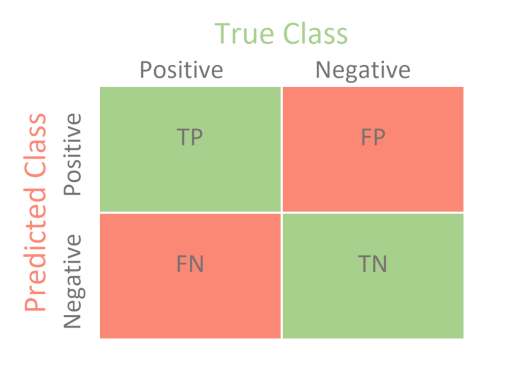

#Lista de taxa de erros 3-15 e matriz de confusão

<Axes: title={'center': 'Graph'}, xlabel='K', ylabel='error_rate'>

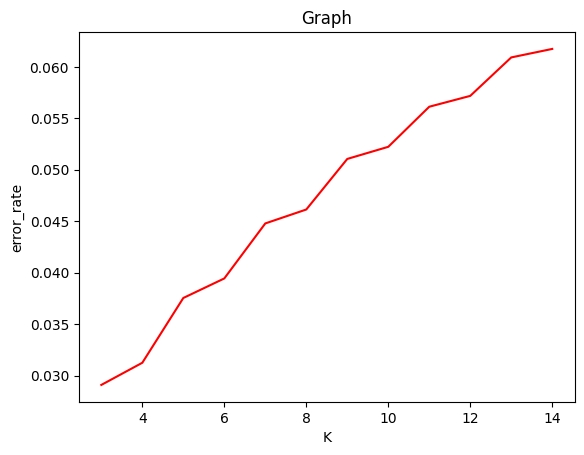

In [ ]:
plt.title('Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x=range(3,15),y=test_error_rate, color='red')

#Lista de taxa de erros 15-19, matriz de confusão e gráfico

In [ ]:
test_error_rate

[0.06578970508063242,
 0.06656349471536849,
 0.06969382551043735,
 0.07038847756889366,
 0.07295605226597257]

<Axes: title={'center': 'Graph'}, xlabel='K', ylabel='error_rate'>

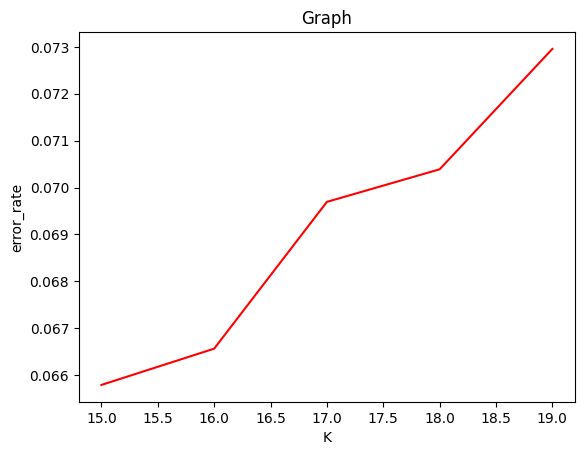

In [ ]:
plt.title('Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x=range(15,20),y=test_error_rate, color='red')

#Execução do melhor hiperparametro K para treinar o modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

###Escolhi o 4 pois, mesmo o 1 tendo menor erro, usar ele pode configurar em overfiting

In [ ]:
y_pred=knn.predict(X_train)
y_pred

In [ ]:
train_accuracy=round(100*accuracy_score(y_train, y_pred),2)
print("Metricas de classificação: \n",classification_report(y_train, y_pred))
print(f'acuracia = {train_accuracy}%')

Metricas de classificação: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93    227591
           1       0.93      0.95      0.94    227313

    accuracy                           0.94    454904
   macro avg       0.94      0.94      0.94    454904
weighted avg       0.94      0.94      0.94    454904

acuracia = 93.53%


#Random Forest

In [ ]:
rf = RandomForestClassifier()
test_error_rate_rf = []

for samples in range(500, 800, 100):
    rf = RandomForestClassifier(n_estimators = samples) #incrementando hiper paramentro de numero de arvores
    rf.fit(X_train, y_train)

    # Fazer previsões nos dados de teste e calcular a taxa de erro
    test_predictions = rf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_predictions)
    test_error_rate_rf.append(test_error)


In [ ]:
test_error_rate_rf

[0.00010551676837311508, 0.00010551676837311508, 0.00011430983240423576]

###Execução com 100 a 700 arvores de 100 em 100
[0.00011430983240423576,<br>
 0.00011430983240423576,<br>
 0.00011430983240423576,<br>
 0.00010551676837311508,<br>
 0.00010551676837311508,<br>
 0.00010551676837311508,<br>
 0.00011430983240423576]

#Execução do melhor hiperparametro de numero de arvores para treinar o modelo

In [ ]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
test_predictions = rf.predict(X_test)
accuracy_score(y_test, test_predictions)

0.9998944832316269

In [ ]:
confusion_matrix(y_test, test_predictions)

array([[56712,    12],
       [    0, 57002]])

#Rede Neural

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.979512160807555


#Rede neural validação-cruzada com holdout

In [ ]:
num_camadas_ocultas = [1, 2, 3]
num_neuronios_ocultos = [16, 32, 64]

for camadas_ocultas in num_camadas_ocultas:
    for neuronios_ocultos in num_neuronios_ocultos:
        model = MLPClassifier(hidden_layer_sizes=(neuronios_ocultos,) * camadas_ocultas, random_state=0)

        #validação cruzada com holdout
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

        print(f"Número de camadas ocultas: {camadas_ocultas}, Neurônios em cada camada oculta: {neuronios_ocultos}")
        print("Acurácia média:", np.mean(scores))
        print("Desvio padrão da acurácia:", np.std(scores))

Número de camadas ocultas: 1, Neurônios em cada camada oculta: 16
Acurácia média: 0.9709564776180741
Desvio padrão da acurácia: 0.013950726096257846


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Número de camadas ocultas: 1, Neurônios em cada camada oculta: 32
Acurácia média: 0.9731921084363983
Desvio padrão da acurácia: 0.010113823599858969
Número de camadas ocultas: 1, Neurônios em cada camada oculta: 64
Acurácia média: 0.9519044881819246
Desvio padrão da acurácia: 0.0813847524755924
Número de camadas ocultas: 2, Neurônios em cada camada oculta: 16
Acurácia média: 0.9422688327504977
Desvio padrão da acurácia: 0.06643793010000643
Número de camadas ocultas: 2, Neurônios em cada camada oculta: 32
Acurácia média: 0.9731723322283307
Desvio padrão da acurácia: 0.01370705909150308
Número de camadas ocultas: 2, Neurônios em cada camada oculta: 64
Acurácia média: 0.9757707069468868
Desvio padrão da acurácia: 0.0052969042752696385
Número de camadas ocultas: 3, Neurônios em cada camada oculta: 16
Acurácia média: 0.8957597365409313
Desvio padrão da acurácia: 0.1540836399715545
Número de camadas ocultas: 3, Neurônios em cada camada oculta: 32
Acurácia média: 0.8486702835308716
Desvio pad

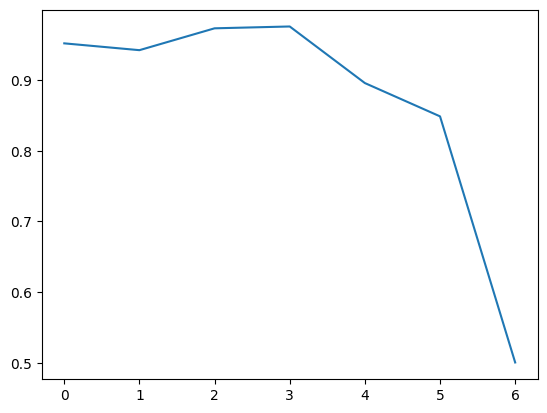

In [4]:
dados = [0.9519044881819246,
         0.9422688327504977,
         0.9731723322283307,
         0.9757707069468868,
         0.8957597365409313,
         0.8486702835308716,
         0.5006418952593557]

df = pd.DataFrame(dados, columns=['Valores'])
plt.plot(df['Valores'])
plt.xticks(range(len(df)), df.index)
plt.show()






